# Q2) A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
### Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline#for encoding
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

UsageError: unrecognized arguments: encoding


In [9]:
df = pd.read_csv('Company_Data (2).csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [11]:
df['Sales'].mean()

7.496325

In [23]:
df["Sales"].value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [49]:
df['Sales']

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [61]:
# since the mean of sales is approx eqaul to 8, weve divided into 2 groups of true and false with the parting vale 8.
df['sale']=df['Sales']>= 8
df['Sales'] = df['sale']
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,True,138,73,11,276,120,Bad,42,17,Yes,Yes,True
1,True,111,48,16,260,83,Good,65,10,Yes,Yes,True
2,True,113,35,10,269,80,Medium,59,12,Yes,Yes,True
3,False,117,100,4,466,97,Medium,55,14,Yes,Yes,False
4,False,141,64,3,340,128,Bad,38,13,Yes,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,True,138,108,17,203,128,Good,33,14,Yes,Yes,True
396,False,139,23,3,37,120,Medium,55,11,No,Yes,False
397,False,162,26,12,368,159,Medium,40,18,Yes,Yes,False
398,False,100,79,7,284,95,Bad,50,12,Yes,Yes,False


In [62]:
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)

In [63]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [64]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   True        138      73           11         276    120          3   42   
1   True        111      48           16         260     83          1   65   
2   True        113      35           10         269     80          2   59   
3  False        117     100            4         466     97          2   55   
4  False        141      64            3         340    128          3   38   

   Education   sale  Urban_Yes  US_Yes  
0         17   True          1       1  
1         10   True          1       1  
2         12   True          1       1  
3         14  False          1       1  
4         13  False          1       0  


In [65]:
x=df.iloc[:,1:]
y=df[['Sales']]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,sale,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,True,1,1
1,111,48,16,260,83,1,65,10,True,1,1
2,113,35,10,269,80,2,59,12,True,1,1
3,117,100,4,466,97,2,55,14,False,1,1
4,141,64,3,340,128,3,38,13,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,True,1,1
396,139,23,3,37,120,2,55,11,False,0,1
397,162,26,12,368,159,2,40,18,False,1,1
398,100,79,7,284,95,3,50,12,False,1,1


In [66]:
y

,Sales
0,True
1,True
2,True
3,False
4,False
...,...
395,True
396,False
397,False
398,False


In [67]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'sale',
 'Urban_Yes',
 'US_Yes']

In [68]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [69]:
x_train.shape

(320, 11)

In [70]:
y_train.shape

(320, 1)

In [71]:
y_test

,Sales
398,False
85,True
249,False
10,True
193,True
...,...
368,True
172,True
389,True
50,False


In [72]:
!pip install sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)


In [73]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

#view transformed values
print(y_transformed)

[1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1
 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1
 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1
 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0]


D:\anac\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train, y_transformed)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

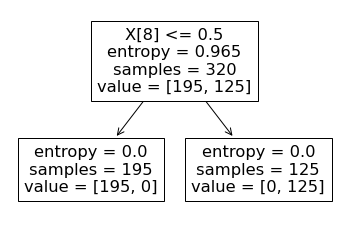

In [75]:
tree.plot_tree(model);

In [76]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

0    41
1    39
dtype: int64

In [77]:
y_test 

,Sales
398,False
85,True
249,False
10,True
193,True
...,...
368,True
172,True
389,True
50,False


In [78]:
dataframe = pd.DataFrame(data=y_test)

In [79]:
y_testt = dataframe.iloc[:,0]

In [80]:
pd.crosstab(y_testt,preds) 

col_0,0,1
Sales,,
False,41,0
True,0,39


In [81]:
np.mean(preds==y_testt)

1.0

In [82]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [83]:
model_gini.fit(x_train, y_transformed)

pred=model.predict(x_test)
np.mean(preds==y_testt)

1.0

In [84]:
from sklearn.tree import DecisionTreeRegressor
array = df.values
X = array[:,0:3]
y = array[:,3]

In [85]:
X_train, X_test, y_transformed, y_testt = train_test_split(X, y, test_size=0.33, random_state=1)
model = DecisionTreeRegressor()
model.fit(X_train, y_transformed)

DecisionTreeRegressor()

In [86]:
model.score(X_test,y_testt)

-1.2033031266236747